In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('kc_house_data_preprocessed.csv')
data.head()

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0
1,2014,12,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0
2,2015,2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0
3,2014,12,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0
4,2015,2,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0


In [3]:
data.describe().round(2)

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,2014.32,6.57,3.37,2.11,2079.90,15106.97,1.49,0.01,3.41,7.66,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46,540088.14
std,0.47,3.12,0.93,0.77,918.44,41420.51,0.54,0.09,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18,367127.20
min,2014.00,1.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00,75000.00
25%,2014.00,4.00,3.00,1.75,1427.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00,321950.00
50%,2014.00,6.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00,450000.00
75%,2015.00,9.00,4.00,2.50,2550.00,10688.00,2.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00,645000.00
max,2015.00,12.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.32,6210.00,871200.00,7700000.00


### Mapping Price Data

In [4]:
data_mapped = data.copy()
data_mapped.loc[data_mapped['yr_built'] <= 1951, ['yr_built']] = 0
data_mapped.loc[(data_mapped['yr_built'] >= 1952) & (data_mapped['yr_built'] <= 1997), ['yr_built']] = 1
data_mapped.loc[data_mapped['yr_built'] >= 1998, ['yr_built']] = 2

data_mapped.head()

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,2014,10,3,1.00,1180,5650,1.0,0,3,7,1180,0,1,0,47.5112,-122.257,1340,5650,221900.0
1,2014,12,3,2.25,2570,7242,2.0,0,3,7,2170,400,0,1991,47.7210,-122.319,1690,7639,538000.0
2,2015,2,2,1.00,770,10000,1.0,0,3,6,770,0,0,0,47.7379,-122.233,2720,8062,180000.0
3,2014,12,4,3.00,1960,5000,1.0,0,5,7,1050,910,1,0,47.5208,-122.393,1360,5000,604000.0
4,2015,2,3,2.00,1680,8080,1.0,0,3,8,1680,0,1,0,47.6168,-122.045,1800,7503,510000.0


### Plotting longitude and latitude

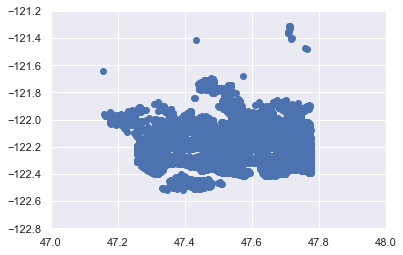

In [5]:
plt.scatter(data_mapped['lat'], data_mapped['long'])
plt.xlim(47,48)
plt.ylim(-122.8, -121.2)
plt.show()

### Selecting the features for analysis

In [12]:
x = data_mapped.iloc[:,12:13]
x.head()

,yr_built
0,1
1,0
2,0
3,1
4,1


### Clustering

In [13]:
kmeans = KMeans(3)

In [14]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 2, 2, ..., 0, 0, 0])

In [16]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,year,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price,cluster
0,2014,10,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,221900.0,1
1,2014,12,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000.0,2
2,2015,2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,180000.0,2
3,2014,12,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,604000.0,1
4,2015,2,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,510000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,5,3,2.50,1530,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,360000.0,0
21609,2015,2,4,2.50,2310,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,400000.0,0
21610,2014,6,2,0.75,1020,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,402101.0,0
21611,2015,1,3,2.50,1600,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,400000.0,0


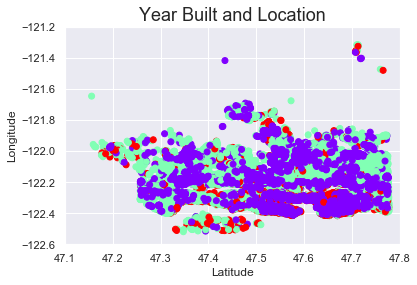

In [63]:
plt.scatter(data_with_clusters['lat'], data_with_clusters['long'], c=data_with_clusters['cluster'], cmap='rainbow')
plt.title('Year Built and Location', fontsize=18)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(47.1,47.8)
plt.ylim(-122.6, -121.2)
plt.show()

### Elbow method

In [25]:
wcss = []

for i in range(1,4):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[10677.916901864619, 3552.8580601345934, 1.3765196287833735e-22]

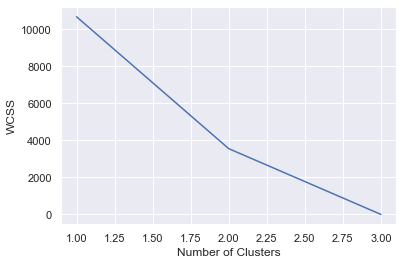

In [26]:
plt.plot(range(1,4), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()